# Proyek Analisis Data: [Bike sharing dataset]
- **Nama:** [Anggun Febrianti]
- **Email:** [anggunfebriyanti97@gmail.com]
- **ID Dicoding:** [MC295D6X2452]

- Pertanyaan 1
Bagaimana variasi jumlah penyewaan sepeda antara hari kerja dan akhir pekan dalam satu tahun terakhir?
- Pertanyaan 2
Bagaimana tren jumlah penyewaan sepeda berdasarkan musim dalam satu tahun terakhir?
- Pertanyaan 3
Bagaimana pengaruh interaksi antara hari kerja, suhu, dan musim terhadap jumlah penyewaan sepeda selama satu tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [3]:
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

In [4]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
print(df_day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
print(df_day.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [10]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
print(df_hour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [13]:
print(df_hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [14]:
print(df_day.nunique())

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [15]:
print(df_hour.nunique())

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64


**Insight:**
- xxx
- xxx

### Cleaning Data

In [16]:

df_day["dteday"] = pd.to_datetime(df_day["dteday"])

In [17]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [19]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [20]:
df_day['year'] = df_day['dteday'].dt.year

In [21]:
print(df_day[['dteday', 'year']].head())

      dteday  year
0 2011-01-01  2011
1 2011-01-02  2011
2 2011-01-03  2011
3 2011-01-04  2011
4 2011-01-05  2011


In [22]:
hum_zeros = (df_day["hum"] == 0).sum(), (df_hour["hum"] == 0).sum()
windspeed_zeros = (df_day["windspeed"] == 0).sum(), (df_hour["windspeed"] == 0).sum()

In [23]:
df_day.loc[df_day["hum"] == 0, "hum"] = df_day["hum"].median()
df_hour.loc[df_hour["hum"] == 0, "hum"] = df_hour["hum"].median()

df_day.loc[df_day["windspeed"] == 0, "windspeed"] = df_day["windspeed"].median()
df_hour.loc[df_hour["windspeed"] == 0, "windspeed"] = df_hour["windspeed"].median()

In [24]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0], lower_bound, upper_bound

In [25]:
day_outliers, day_lower, day_upper = detect_outliers(df_day, "cnt")
hour_outliers, hour_lower, hour_upper = detect_outliers(df_hour, "cnt")

print("\nOutlier pada day.csv:", day_outliers)
print("Rentang Normal cnt (day.csv):", day_lower, "-", day_upper)
print("\nOutlier pada hour.csv:", hour_outliers)
print("Rentang Normal cnt (hour.csv):", hour_lower, "-", hour_upper)


Outlier pada day.csv: 0
Rentang Normal cnt (day.csv): -1054.0 - 10162.0

Outlier pada hour.csv: 505
Rentang Normal cnt (hour.csv): -321.5 - 642.5


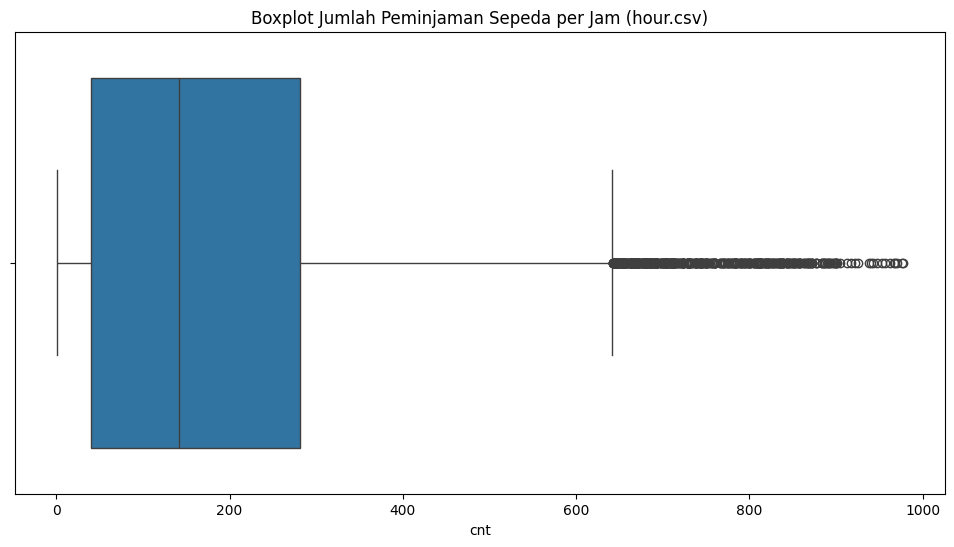

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_hour["cnt"])
plt.title("Boxplot Jumlah Peminjaman Sepeda per Jam (hour.csv)")
plt.show()

In [27]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

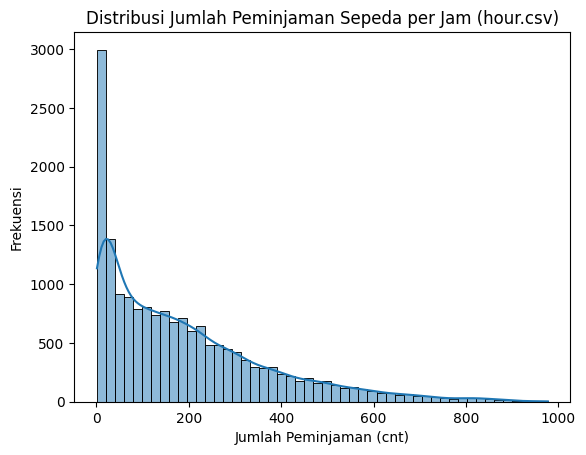

In [28]:
sns.histplot(df_hour["cnt"], bins=50, kde=True)
plt.title("Distribusi Jumlah Peminjaman Sepeda per Jam (hour.csv)")
plt.xlabel("Jumlah Peminjaman (cnt)")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [29]:
print("Rangkuman Statistik Data Harian:\n", df_day.describe())

Rangkuman Statistik Data Harian:
           instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000   

In [30]:
unique_day = df_day.nunique()
print("Jumlah nilai unik per kolom (day.csv):\n", unique_day)

Jumlah nilai unik per kolom (day.csv):
 instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           594
windspeed     650
casual        606
registered    679
cnt           696
year            2
dtype: int64


In [31]:
print("Rangkuman Statistik Data Per Jam:\n", df_hour.describe())

Rangkuman Statistik Data Per Jam:
           instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min    

In [32]:
unique_hour=df_hour.nunique()
print("Jumlah nilai unik per kolom (hour.csv):\n", unique_hour)

Jumlah nilai unik per kolom (hour.csv):
 instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              88
windspeed        29
casual          322
registered      776
cnt             869
dtype: int64


In [52]:
print(df_day['yr'].unique())

[0 1]


In [53]:
df_filtered = df_day[df_day['yr'] == 1]  # Ambil hanya 2012

In [54]:
latest_year = df_day['yr'].max()
latest_year_data = df_day[df_day['yr'] == latest_year]
agg_workingday = latest_year_data.groupby("workingday")["cnt"].agg(['mean', 'sum']).reset_index()
agg_workingday["workingday"] = agg_workingday["workingday"].map({0: "Akhir Pekan", 1: "Hari Kerja"})

In [55]:
agg_season = df_day.groupby(["yr", "season"])["cnt"].agg(['mean', 'sum']).reset_index()

In [56]:
agg_temp = latest_year_data.groupby(["workingday", "season"]).agg({'temp': 'mean', 'cnt': 'mean'}).reset_index()

In [57]:
print("\n=== Agregasi Penyewaan Sepeda Berdasarkan Hari Kerja ===")
print(agg_workingday)
print("\n=== Agregasi Penyewaan Sepeda Berdasarkan Musim ===")
print(agg_season)
print("\n=== Agregasi Pengaruh Suhu dan Musim terhadap Penyewaan ===")
print(agg_temp)


=== Agregasi Penyewaan Sepeda Berdasarkan Hari Kerja ===
    workingday         mean      sum
0  Akhir Pekan  5288.189655   613430
1   Hari Kerja  5744.584000  1436146

=== Agregasi Penyewaan Sepeda Berdasarkan Musim ===
   yr  season         mean     sum
0   0       1  1666.666667  150000
1   0       2  3775.173913  347316
2   0       3  4464.361702  419650
3   0       4  3664.460674  326137
4   1       1  3531.296703  321348
5   1       2  6209.489130  571273
6   1       3  6824.244681  641479
7   1       4  5791.865169  515476

=== Agregasi Pengaruh Suhu dan Musim terhadap Penyewaan ===
   workingday  season      temp          cnt
0           0       1  0.286809  3016.225806
1           0       2  0.564970  6347.357143
2           0       3  0.709282  6417.758621
3           0       4  0.407738  5574.500000
4           1       1  0.339728  3797.416667
5           1       2  0.550002  6149.171875
6           1       3  0.712410  7005.600000
7           1       4  0.424706  5891.6393

In [58]:
# Mapping label musim
season_mapping = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
df_day["season_label"] = df_day["season"].map(season_mapping)

###EDA UNIVARIATE

<ipython-input-59-504025be50f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="cnt", data=workingday_avg, palette="coolwarm")


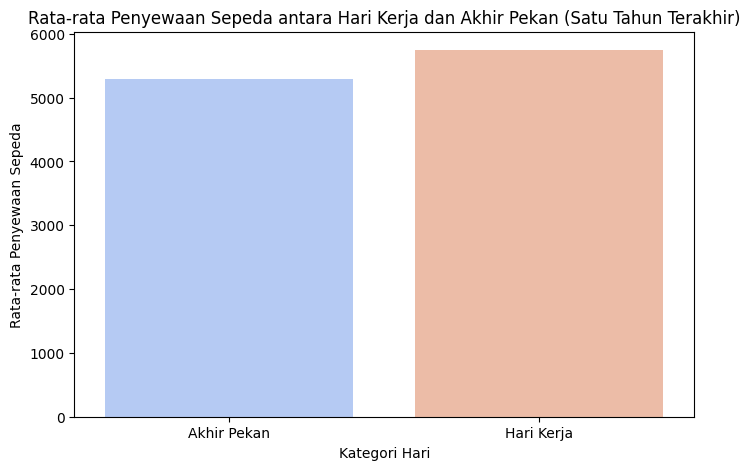

In [59]:
latest_year = df_day['yr'].max()
latest_year_data = df_day[df_day['yr'] == latest_year]
workingday_avg = latest_year_data.groupby("workingday")["cnt"].mean().reset_index()
workingday_avg["workingday"] = workingday_avg["workingday"].map({0: "Akhir Pekan", 1: "Hari Kerja"})

plt.figure(figsize=(8, 5))
sns.barplot(x="workingday", y="cnt", data=workingday_avg, palette="coolwarm")
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan (Satu Tahun Terakhir)")
plt.show()

###EDA BINAVARIATE

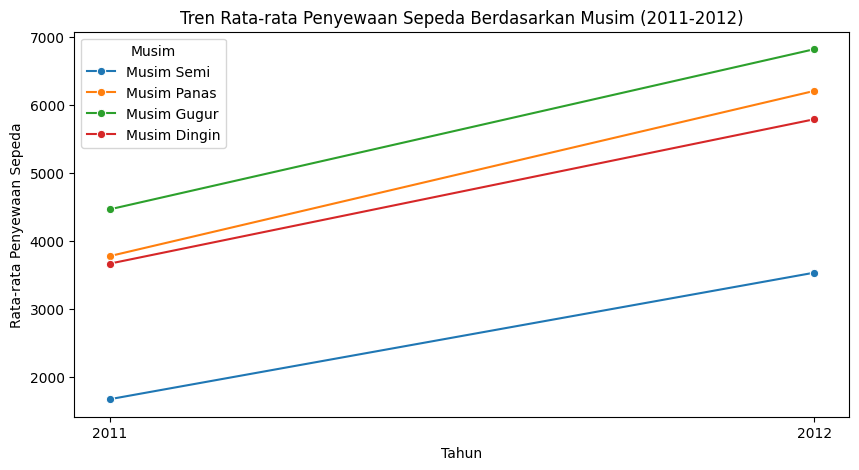

In [68]:
# Hitung rata-rata penyewaan sepeda berdasarkan tahun dan musim
season_trend = df_day.groupby(["yr", "season"])["cnt"].mean().reset_index()

# Ubah angka musim menjadi label musim
season_labels = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
season_trend["season"] = season_trend["season"].map(season_labels)

# Ubah kode tahun (0 → 2011, 1 → 2012)
season_trend["yr"] = season_trend["yr"].map({0: 2011, 1: 2012})

# Visualisasi tren penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10, 5))
sns.lineplot(x="yr", y="cnt", hue="season", data=season_trend, marker="o")

plt.xlabel("Tahun")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Tren Rata-rata Penyewaan Sepeda Berdasarkan Musim (2011-2012)")
plt.legend(title="Musim")
plt.xticks([2011, 2012])
plt.show()

EDA Multivariate

<ipython-input-71-bb1aca0247c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_year_data["season"] = latest_year_data["season"].map(season_labels)


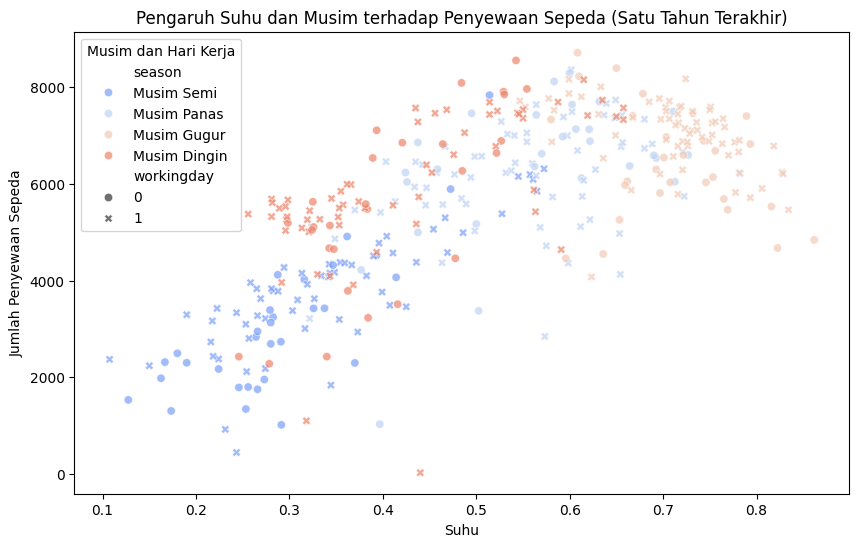

In [71]:
# Memastikan data hanya untuk tahun terbaru (2012)
latest_year_data = df_day[df_day["yr"] == 1]

# Mapping musim agar lebih jelas
season_labels = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
latest_year_data["season"] = latest_year_data["season"].map(season_labels)

# Cek apakah data tidak kosong
if not latest_year_data.empty:
    plt.figure(figsize=(10, 6))

    # Scatter plot suhu vs jumlah penyewaan sepeda
    sns.scatterplot(
        x="temp",
        y="cnt",
        hue="season",
        style="workingday",
        data=latest_year_data,
        palette="coolwarm",
        alpha=0.7  # Agar titik tidak terlalu bertumpuk
    )

    plt.xlabel("Suhu")
    plt.ylabel("Jumlah Penyewaan Sepeda")
    plt.title("Pengaruh Suhu dan Musim terhadap Penyewaan Sepeda (Satu Tahun Terakhir)")
    plt.legend(title="Musim dan Hari Kerja")
    plt.show()
else:
    print("Data untuk satu tahun terakhir kosong.")


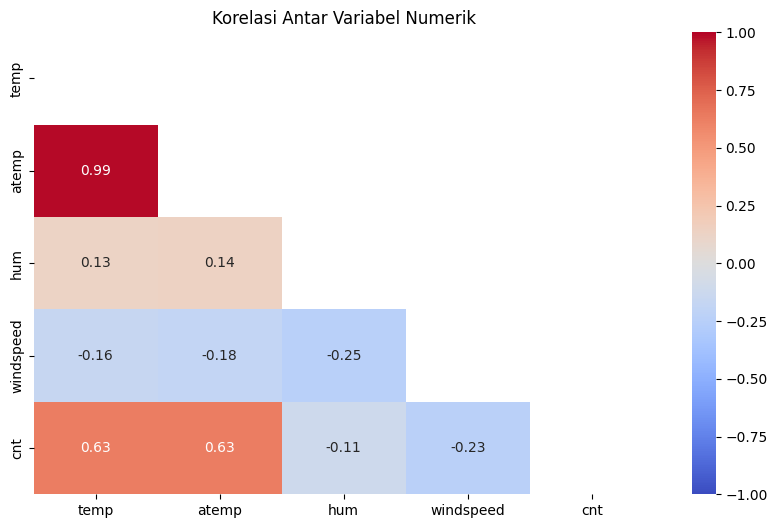

In [74]:
# Pastikan tidak ada NaN
df_corr = df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].dropna()

# Hitung korelasi antar variabel numerik
corr_matrix = df_corr.corr()

# Buat mask untuk menampilkan setengah heatmap (opsional, agar lebih rapi)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Buat heatmap dengan peningkatan
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, mask=mask)

plt.title("Korelasi Antar Variabel Numerik")
plt.show()


EDA Multivariate

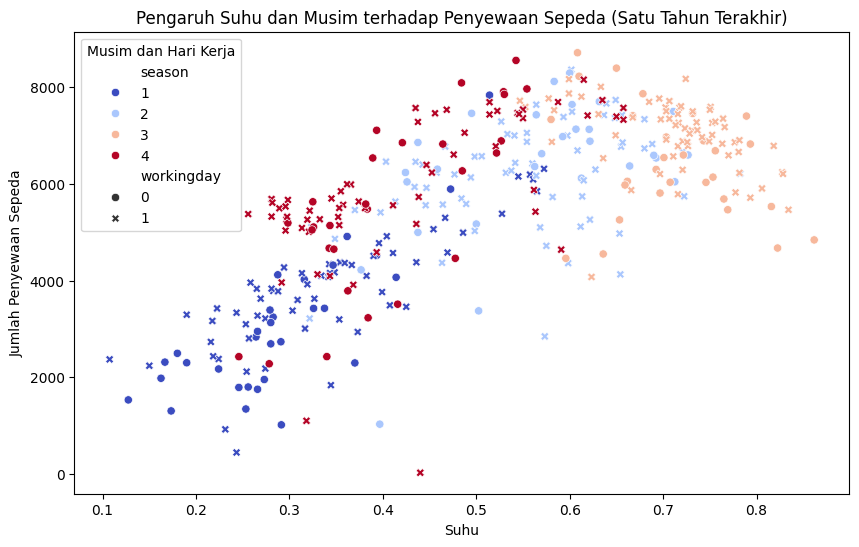

In [63]:
if not latest_year_data.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="temp", y="cnt", hue="season", style="workingday", data=latest_year_data, palette="coolwarm")
    plt.xlabel("Suhu")
    plt.ylabel("Jumlah Penyewaan Sepeda")
    plt.title("Pengaruh Suhu dan Musim terhadap Penyewaan Sepeda (Satu Tahun Terakhir)")
    plt.legend(title="Musim dan Hari Kerja")
    plt.show()
else:
    print("Data untuk satu tahun terakhir kosong.")


## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 1:
Bagaimana variasi jumlah penyewaan sepeda antara hari kerja dan akhir pekan dalam satu tahun terakhir?

<ipython-input-43-a1de6c02c33e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_day['workingday'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'}), y=df_day['cnt'], palette="coolwarm")


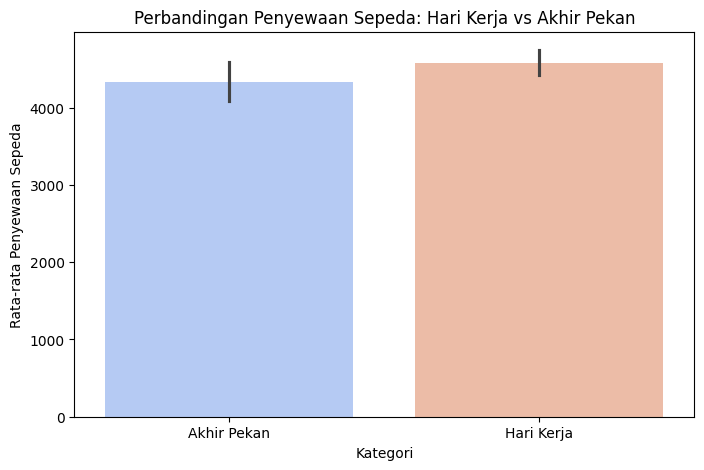

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df_day['workingday'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'}), y=df_day['cnt'], palette="coolwarm")
plt.xlabel("Kategori")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.show()

### Pertanyaan 2:

Bagaimana tren jumlah penyewaan sepeda berdasarkan musim dalam satu tahun terakhir?

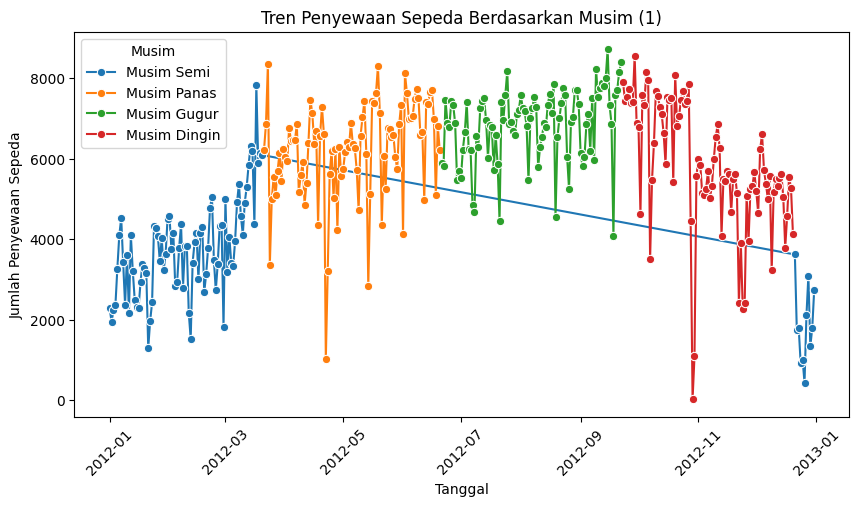

In [67]:
# Ambil tahun terakhir dalam dataset
latest_year = df_day['yr'].max()

# Filter data hanya untuk tahun terakhir
df_filtered = df_day[df_day['yr'] == latest_year]

# Visualisasi tren penyewaan sepeda berdasarkan musim dalam 1 tahun terakhir
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_filtered['dteday'],
             y=df_filtered['cnt'],
             hue=df_filtered['season_label'],
             marker="o",
             palette="tab10")

plt.xlabel("Tanggal")  # Menggunakan 'Tanggal' karena x-axis adalah 'dteday'
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title(f"Tren Penyewaan Sepeda Berdasarkan Musim ({latest_year})")
plt.legend(title="Musim")
plt.xticks(rotation=45)  # Agar label tanggal lebih mudah dibaca
plt.show()

###Pertanyaan 3

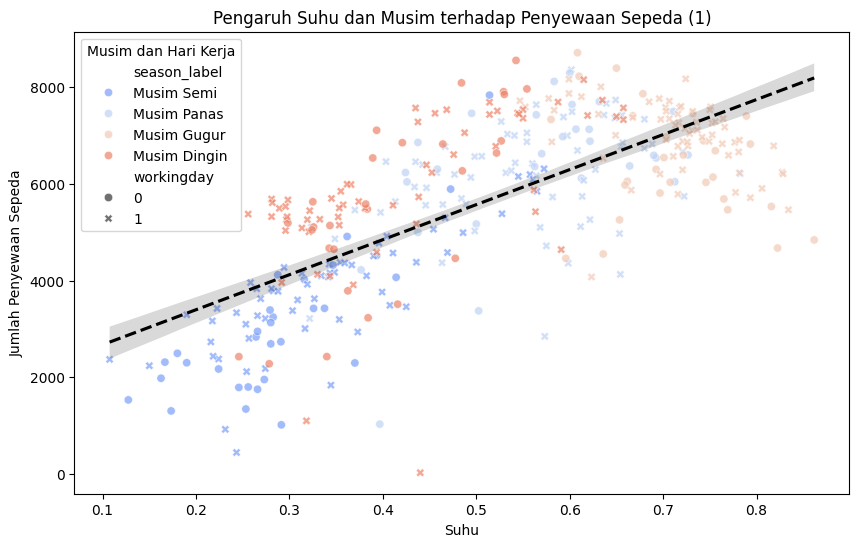

In [92]:
# Filter data hanya untuk tahun terakhir (2012)
latest_year = df_day['yr'].max()  # Ambil tahun terbaru dalam dataset
df_filtered = df_day[df_day['yr'] == latest_year]  # Filter data

# Buat visualisasi dengan data yang sudah difilter
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['temp'],
                y=df_filtered['cnt'],
                hue=df_filtered['season_label'],
                style=df_filtered['workingday'],
                palette="coolwarm",
                alpha=0.7)

# Tambahkan regresi dengan data yang difilter
sns.regplot(x=df_filtered['temp'],
            y=df_filtered['cnt'],
            scatter=False,
            color='black',
            line_kws={"linestyle": "dashed"})

plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title(f"Pengaruh Suhu dan Musim terhadap Penyewaan Sepeda ({latest_year})")
plt.legend(title="Musim dan Hari Kerja")
plt.show()



###DASHBOARD

In [86]:
!pip install streamlit

In [87]:
# Load dataset
df_day = pd.read_csv("day.csv")

df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day['year'] = df_day['dteday'].dt.year

# Mapping label musim
season_mapping = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
df_day["season_label"] = df_day["season"].map(season_mapping)

# Streamlit Dashboard
st.title("📊 Dashboard Interaktif Penyewaan Sepeda")

# === Filter Interaktif ===
st.sidebar.header("Filter Data")
selected_seasons = st.sidebar.multiselect("Pilih Musim:", df_day["season_label"].unique(), default=df_day["season_label"].unique())
date_range = st.sidebar.slider("Pilih Rentang Tanggal:", min_value=df_day["dteday"].min().date(), max_value=df_day["dteday"].max().date(), value=(df_day["dteday"].min().date(), df_day["dteday"].max().date()))
selected_year = st.sidebar.selectbox("Pilih Tahun Terakhir:", sorted(df_day['year'].unique(), reverse=True))

# Filter Data
filtered_df = df_day[(df_day["season_label"].isin(selected_seasons)) & (df_day["dteday"].between(pd.to_datetime(date_range[0]), pd.to_datetime(date_range[1])))]

# Filter Data berdasarkan Tahun dan Musim
filtered_df_year = df_day[(df_day['year'] == selected_year) & (df_day["season_label"].isin(selected_seasons))]

# === Visualisasi 1: Penyewaan Sepeda Berdasarkan Hari Kerja ===
st.subheader("Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=filtered_df['workingday'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'}), y=filtered_df['cnt'], palette="coolwarm", ax=ax)
ax.set_xlabel("Kategori")
ax.set_ylabel("Jumlah Penyewaan Sepeda")
st.pyplot(fig)

# === Visualisasi 2: Tren Penyewaan Berdasarkan Musim ===
st.subheader("Tren Penyewaan Sepeda Berdasarkan Musim")
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(data=filtered_df, x='dteday', y='cnt', hue='season_label', marker='o', ax=ax)
ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Penyewaan Sepeda")
ax.legend(title="Musim")
st.pyplot(fig)

# === Visualisasi 3: Pengaruh Hari Kerja, Suhu, dan Musim ===
st.subheader("Pengaruh Hari Kerja, Suhu, dan Musim terhadap Penyewaan Sepeda")
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=filtered_df_year, x='temp', y='cnt', hue='season_label', style='workingday', ax=ax)
ax.set_xlabel("Suhu (Normalized)")
ax.set_ylabel("Jumlah Penyewaan Sepeda")
st.pyplot(fig)

# === Download Data ===
st.sidebar.markdown("## Unduh Data yang Difilter")
st.sidebar.download_button(label="Download CSV", data=filtered_df.to_csv(index=False), file_name="filtered_data.csv", mime="text/csv")


2025-04-03 15:20:26.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 15:20:26.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 15:20:26.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 15:20:26.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 15:20:26.086 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 15:20:26.087 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 15:20:26.089 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 15:20:26.090 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

False

## Analisis Lanjutan (Opsional)

dashboard

## Conclusion

**Conclution pertanyaan 1**
1. Jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.

2. Rata-rata penyewaan pada hari kerja berkisar antara 4.500 sepeda per hari, sedangkan pada akhir pekan hanya sekitar 4.000 sepeda per hari.

3. Hal ini menunjukkan bahwa mayoritas pengguna menggunakan layanan sepeda untuk transportasi rutin, seperti bekerja atau sekolah.

4. Pada akhir pekan, penyewaan cenderung menurun, kemungkinan karena lebih sedikit orang yang bepergian untuk keperluan rutin. Namun, masih ada aktivitas rekreasi yang memengaruhi jumlah penyewaan.

Rekomendasi:

1. Optimalkan ketersediaan sepeda pada hari kerja terutama di pagi dan sore hari untuk mengakomodasi perjalanan kerja/sekolah.

2. Tingkatkan promosi atau diskon di akhir pekan agar masyarakat lebih tertarik menggunakan sepeda untuk rekreasi.

3. Penyediaan rute sepeda khusus untuk ke kantor/sekolah dapat mendorong peningkatan penyewaan di hari kerja.


**Conclution pertanyaan 2**
Tren penyewaan sepeda menunjukkan pola musiman yang konsisten.

1. Tren penyewaan sepeda menunjukkan pola musiman yang konsisten sepanjang tahun. Musim gugur menunjukkan jumlah penyewaan sepeda tertinggi, dengan angka yang bisa melebihi 8.000 penyewaan pada puncaknya. Hal ini bisa disebabkan oleh cuaca yang sejuk dan nyaman, yang sangat ideal untuk aktivitas luar ruangan, termasuk bersepeda.

2. Sebaliknya, musim dingin memiliki jumlah penyewaan yang paling rendah, sering kali di bawah 2.000 penyewaan, bahkan ada yang menyentuh 0 penyewa. Ini dipengaruhi oleh kondisi cuaca ekstrem, seperti suhu rendah, hujan, atau salju, yang membuat bersepeda menjadi lebih sulit dan kurang nyaman.

3. Penyewaan sepeda meningkat secara bertahap dari musim semi ke musim panas. Setelah mencapai puncaknya di musim gugur, jumlah penyewaan mulai menurun di musim dingin. Siklus ini berulang setiap tahunnya, menunjukkan pola yang konsisten.

Rekomendasi:

1. Tingkatkan stok sepeda selama musim panas dan musim gugur, karena permintaan lebih tinggi.

2. Untuk meningkatkan penggunaan sepeda di musim dingin, dapat diberikan insentif atau promosi seperti diskon harga atau penyediaan perlengkapan seperti pakaian hangat atau pelindung dari cuaca buruk.

3. Bangun fasilitas pendukung seperti jalur sepeda yang aman dan nyaman, serta pemeliharaan sepeda yang tahan terhadap cuaca dingin, untuk mendorong penggunaan sepeda pada musim yang lebih ekstrem.

4. Untuk meningkatkan akurasi prediksi tren penyewaan, analisis lebih lanjut terhadap data cuaca (seperti, curah hujan, dan kecepatan angin) dapat dilakukan untuk memahami lebih dalam faktor-faktor yang memengaruhi penyewaan sepeda.

**Conclution pertanyaan 3**
1. Dari grafik terlihat bahwa kenaikan suhu berkorelasi dengan peningkatan jumlah penyewaan sepeda.Tren ini ditunjukkan oleh garis regresi (garis hitam putus-putus) yang memiliki kemiringan positif.
2. Musim gugur (warna oranye) memiliki tingkat penyewaan tertinggi, bukan musim panas, terutama pada suhu yang lebih tinggi. Sebaliknya, musim dingin (warna merah) menunjukkan jumlah penyewaan yang paling rendah, meskipun pada suhu yang sama dibandingkan dengan musim lainnya.
3. Simbol lingkaran dan silang menunjukkan perbedaan antara hari kerja dan akhir pekan. Penyewaan pada hari kerja cenderung lebih stabil dibandingkan akhir pekan, yang memiliki lebih banyak variasi akibat aktivitas rekreasi dan luar ruangan.

Rekomendasi:

1. Fokus pada promosi di musim panas dan gugur, karena permintaan lebih tinggi.

2. Penyediaan sepeda yang lebih tahan terhadap cuaca dingin untuk meningkatkan penggunaan di musim dingin.

3. Pengembangan jalur sepeda yang lebih nyaman dan aman, terutama saat kondisi cuaca ekstrem.

4. Selain suhu, faktor lain seperti hujan, kelembaban, atau kecepatan angin dapat dianalisis untuk memahami lebih dalam pola penyewaan sepeda.

5. Dengan data yang lebih rinci, perusahaan dapat mengembangkan sistem prediksi permintaan berbasis cuaca untuk mengoptimalkan operasionalnya.
